Projet n°7  : Implémentez un modèle de scoring

# Modules import

In [1]:
import os
import pandas as pd
import gc
import missingno as msno
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data

In [2]:
df = pd.read_csv('csv/feature_matrix.csv')

In [3]:
df.shape

(307511, 349)

In [4]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None) :
    display(df.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,set,COUNT(bureau),MAX(bureau.AMT_ANNUITY),MAX(bureau.AMT_CREDIT_MAX_OVERDUE),MAX(bureau.AMT_CREDIT_SUM),MAX(bureau.AMT_CREDIT_SUM_DEBT),MAX(bureau.AMT_CREDIT_SUM_LIMIT),MAX(bureau.AMT_CREDIT_SUM_OVERDUE),MAX(bureau.CNT_CREDIT_PROLONG),MAX(bureau.CREDIT_DAY_OVERDUE),MAX(bureau.DAYS_CREDIT),MAX(bureau.DAYS_CREDIT_ENDDATE),MAX(bureau.DAYS_CREDIT_UPDATE),MAX(bureau.DAYS_ENDDATE_FACT),MEAN(bureau.AMT_ANNUITY),MEAN(bureau.AMT_CREDIT_MAX_OVERDUE),MEAN(bureau.AMT_CREDIT_SUM),MEAN(bureau.AMT_CREDIT_SUM_DEBT),MEAN(bureau.AMT_CREDIT_SUM_LIMIT),MEAN(bureau.AMT_CREDIT_SUM_OVERDUE),MEAN(bureau.CNT_CREDIT_PROLONG),MEAN(bureau.CREDIT_DAY_OVERDUE),MEAN(bureau.DAYS_CREDIT),MEAN(bureau.DAYS_CREDIT_ENDDATE),MEAN(bureau.DAYS_CREDIT_UPDATE),MEAN(bureau.DAYS_ENDDATE_FACT),MIN(bureau.AMT_ANNUITY),MIN(bureau.AMT_CREDIT_MAX_OVERDUE),MIN(bureau.AMT_CREDIT_SUM),MIN(bureau.AMT_CREDIT_SUM_DEBT),MIN(bureau.AMT_CREDIT_SUM_LIMIT),MIN(bureau.AMT_CREDIT_SUM_OVERDUE),MIN(bureau.CNT_CREDIT_PROLONG),MIN(bureau.CREDIT_DAY_OVERDUE),MIN(bureau.DAYS_CREDIT),MIN(bureau.DAYS_CREDIT_ENDDATE),MIN(bureau.DAYS_CREDIT_UPDATE),MIN(bureau.DAYS_ENDDATE_FACT),MODE(bureau.CREDIT_ACTIVE),MODE(bureau.CREDIT_CURRENCY),MODE(bureau.CREDIT_TYPE),NUM_UNIQUE(bureau.CREDIT_ACTIVE),NUM_UNIQUE(bureau.CREDIT_CURRENCY),NUM_UNIQUE(bureau.CREDIT_TYPE),SKEW(bureau.AMT_ANNUITY),SKEW(bureau.AMT_CREDIT_MAX_OVERDUE),SKEW(bureau.AMT_CREDIT_SUM),SKEW(bureau.AMT_CREDIT_SUM_DEBT),SKEW(bureau.AMT_CREDIT_SUM_LIMIT),SKEW(bureau.AMT_CREDIT_SUM_OVERDUE),SKEW(bureau.CNT_CREDIT_PROLONG),SKEW(bureau.CREDIT_DAY_OVERDUE),SKEW(bureau.DAYS_CREDIT),SKEW(bureau.DAYS_CREDIT_ENDDATE),SKEW(bureau.DAYS_CREDIT_UPDATE),SKEW(bureau.DAYS_ENDDATE_FACT),STD(bureau.AMT_ANNUITY),STD(bureau.AMT_CREDIT_MAX_OVERDUE),STD(bureau.AMT_CREDIT_SUM),STD(bureau.AMT_CREDIT_SUM_DEBT

In [5]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None) :
    display(df.tail())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,set,COUNT(bureau),MAX(bureau.AMT_ANNUITY),MAX(bureau.AMT_CREDIT_MAX_OVERDUE),MAX(bureau.AMT_CREDIT_SUM),MAX(bureau.AMT_CREDIT_SUM_DEBT),MAX(bureau.AMT_CREDIT_SUM_LIMIT),MAX(bureau.AMT_CREDIT_SUM_OVERDUE),MAX(bureau.CNT_CREDIT_PROLONG),MAX(bureau.CREDIT_DAY_OVERDUE),MAX(bureau.DAYS_CREDIT),MAX(bureau.DAYS_CREDIT_ENDDATE),MAX(bureau.DAYS_CREDIT_UPDATE),MAX(bureau.DAYS_ENDDATE_FACT),MEAN(bureau.AMT_ANNUITY),MEAN(bureau.AMT_CREDIT_MAX_OVERDUE),MEAN(bureau.AMT_CREDIT_SUM),MEAN(bureau.AMT_CREDIT_SUM_DEBT),MEAN(bureau.AMT_CREDIT_SUM_LIMIT),MEAN(bureau.AMT_CREDIT_SUM_OVERDUE),MEAN(bureau.CNT_CREDIT_PROLONG),MEAN(bureau.CREDIT_DAY_OVERDUE),MEAN(bureau.DAYS_CREDIT),MEAN(bureau.DAYS_CREDIT_ENDDATE),MEAN(bureau.DAYS_CREDIT_UPDATE),MEAN(bureau.DAYS_ENDDATE_FACT),MIN(bureau.AMT_ANNUITY),MIN(bureau.AMT_CREDIT_MAX_OVERDUE),MIN(bureau.AMT_CREDIT_SUM),MIN(bureau.AMT_CREDIT_SUM_DEBT),MIN(bureau.AMT_CREDIT_SUM_LIMIT),MIN(bureau.AMT_CREDIT_SUM_OVERDUE),MIN(bureau.CNT_CREDIT_PROLONG),MIN(bureau.CREDIT_DAY_OVERDUE),MIN(bureau.DAYS_CREDIT),MIN(bureau.DAYS_CREDIT_ENDDATE),MIN(bureau.DAYS_CREDIT_UPDATE),MIN(bureau.DAYS_ENDDATE_FACT),MODE(bureau.CREDIT_ACTIVE),MODE(bureau.CREDIT_CURRENCY),MODE(bureau.CREDIT_TYPE),NUM_UNIQUE(bureau.CREDIT_ACTIVE),NUM_UNIQUE(bureau.CREDIT_CURRENCY),NUM_UNIQUE(bureau.CREDIT_TYPE),SKEW(bureau.AMT_ANNUITY),SKEW(bureau.AMT_CREDIT_MAX_OVERDUE),SKEW(bureau.AMT_CREDIT_SUM),SKEW(bureau.AMT_CREDIT_SUM_DEBT),SKEW(bureau.AMT_CREDIT_SUM_LIMIT),SKEW(bureau.AMT_CREDIT_SUM_OVERDUE),SKEW(bureau.CNT_CREDIT_PROLONG),SKEW(bureau.CREDIT_DAY_OVERDUE),SKEW(bureau.DAYS_CREDIT),SKEW(bureau.DAYS_CREDIT_ENDDATE),SKEW(bureau.DAYS_CREDIT_UPDATE),SKEW(bureau.DAYS_ENDDATE_FACT),STD(bureau.AMT_ANNUITY),STD(bureau.AMT_CREDIT_MAX_OVERDUE),STD(bureau.AMT_CREDIT_SUM),STD(bureau.AMT_CREDIT_SUM_DEBT

# Exploration

In [6]:
# Visualization of the missing data

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(df.isnull().sum() / len(df))

SK_ID_CURR                                          0.000000
TARGET                                              0.000000
NAME_CONTRACT_TYPE                                  0.000000
CODE_GENDER                                         0.000000
FLAG_OWN_CAR                                        0.000000
FLAG_OWN_REALTY                                     0.000000
CNT_CHILDREN                                        0.000000
AMT_INCOME_TOTAL                                    0.000000
AMT_CREDIT                                          0.000000
AMT_ANNUITY                                         0.000039
AMT_GOODS_PRICE                                     0.000904
NAME_TYPE_SUITE                                     0.004201
NAME_INCOME_TYPE                                    0.000000
NAME_EDUCATION_TYPE                                 0.000000
NAME_FAMILY_STATUS                                  0.000000
NAME_HOUSING_TYPE                                   0.000000
REGION_POPULATION_RELATI

In [7]:
# Removing the variable which has more thant 60% of missing values

nan_per = df.isnull().sum() / len(df)

col_sel = nan_per[nan_per < 0.6].index

df = df[col_sel]

In [8]:
# One Hot Encoding with pandas to get correct columns names

df_dum = pd.get_dummies(df)

In [9]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_dum.describe())

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,COUNT(bureau),MAX(bureau.AMT_CREDIT_MAX_OVERDUE),MAX(bureau.AMT_CREDIT_SUM),MAX(bureau.AMT_CREDIT_SUM_DEBT),MAX(bureau.AMT_CREDIT_SUM_LIMIT),MAX(bureau.AMT_CREDIT_SUM_OVERDUE),MAX(bureau.CNT_CREDIT_PROLONG),MAX(bureau.CREDIT_DAY_OVERDUE),MAX(bureau.DAYS_CREDIT),MAX(bureau.DAYS_CREDIT_ENDDATE),MAX(bureau.DAYS_CREDIT_UPDATE),MAX(bureau.DAYS_ENDDATE_FACT),MEAN(bureau.AMT_CREDIT_MAX_OVERDUE),MEAN(bureau.AMT_CREDIT_SUM),MEAN(bureau.AMT_CREDIT_SUM_DEBT),MEAN(bureau.AMT_CREDIT_SUM_LIMIT),MEAN(bureau.AMT_CREDIT_SUM_OVERDUE),MEAN(bureau.CNT_CREDIT_PROLONG),MEAN(bureau.CREDIT_DAY_OVERDUE),MEAN(bureau.DAYS_CREDIT),MEAN(bureau.DAYS_CREDIT_ENDDATE),MEAN(bureau.DAYS_CREDIT_UPDATE),MEAN(bureau.DAYS_ENDDATE_FACT),MIN(bureau.AMT_CREDIT_MAX_OVERDUE),MIN(bureau.AMT_CREDIT_SUM),MIN(bureau.AMT_CREDIT_SUM_DEBT),MIN(bureau.AMT_CREDIT_SUM_LIMIT),MIN(bureau.AMT_CREDIT_SUM_OVERDUE),MIN(bureau.CNT_CREDIT_PROLONG),MIN(bureau.CREDIT_DAY_OVERDUE),MIN(bureau.DAYS_CREDIT),MIN(bureau.DAYS_CREDIT_ENDDATE),MIN(bureau.DAYS_CREDIT_UPDATE),MIN(bureau.DAYS_ENDDATE_FACT),NUM_UNIQUE(bureau.CREDIT_ACTIVE),NUM_UNIQUE(bureau.CREDIT_CURRENCY),NUM_UNIQUE(bureau.CREDIT_TYPE),SKEW(bureau.AMT_CREDIT_SUM),SKEW(bureau.AMT_CREDIT_SUM_DEBT),SKEW(bureau.AMT_CREDIT_SUM_LIMIT),SKEW(bureau.AMT_CREDIT_SUM_OVERDUE),SKEW(bureau.CNT_CREDIT_PROLONG),SKEW(bureau.CREDIT_DAY_OVERDUE),SKEW(bureau.DAYS_CREDIT),SKEW(bureau.DAYS_CREDIT_ENDDATE),SKEW(bureau.DAYS_CREDIT_UPDATE),SKEW(bureau.DAYS_ENDDATE_FACT),STD(bureau.AMT_CREDIT_SUM),STD(bureau.AMT_CREDIT_SUM_DEBT),STD(bureau.AMT_CREDIT_SUM_LIMIT),STD(bureau.AMT_CREDIT_SUM_OVERDUE),STD(bureau.CNT_CREDIT_PROLONG),STD(bureau.CREDIT_DAY_OVERDUE),STD(bureau.DAYS_CREDIT),STD(bureau.DAYS_CREDIT_ENDDATE),STD(bureau.DAYS_CREDIT_UPDATE),STD(bureau.DAYS_ENDDATE_FACT),SUM(bureau.AMT_ANNUITY),SUM(bureau.AMT_CREDIT_MAX_OVERDUE),SUM(bureau.AMT_CREDIT_SUM),SUM(bureau.AMT_CREDIT_SUM_DEBT),SUM(bureau.AMT_CREDIT_SUM_LIMIT),SUM(bureau.AMT_CREDIT_SUM_OVERDUE),SUM(bureau.CNT_CREDIT_PROLONG),SUM(bureau.CREDIT_DAY_OVERDUE),SUM(bureau.DAYS_CREDIT),SUM(bureau.DAYS_CREDIT_ENDDATE),SUM(bureau.DAYS_CREDIT_UPDATE),SUM(bureau.DAYS_ENDDATE_FACT),COUNT(previous),MAX(previous.AMT_ANNUITY),MAX(previous.AMT_APPLICATION),MAX(previous.AMT_CREDIT),MAX(previous.AMT_DOWN_PAYMENT),MAX(previous.AMT_GOODS_PRICE),MAX(previous.CNT_PAYMENT),MAX(previous.DAYS_DECISION),MAX(previous.DAYS_FIRST_DRAW

## Focus on DAYS_EMPLOYED

In [10]:
df_dum['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [11]:
df_dum['DAYS_EMPLOYED'].value_counts() /len(df_dum)

 365243    0.180072
-200       0.000507
-224       0.000494
-230       0.000491
-199       0.000491
             ...   
-13961     0.000003
-11827     0.000003
-10176     0.000003
-9459      0.000003
-8694      0.000003
Name: DAYS_EMPLOYED, Length: 12574, dtype: float64

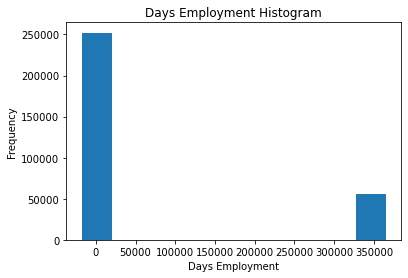

In [12]:
df['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [13]:
anom = df[df['DAYS_EMPLOYED'] == 365243]
non_anom = df[df['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


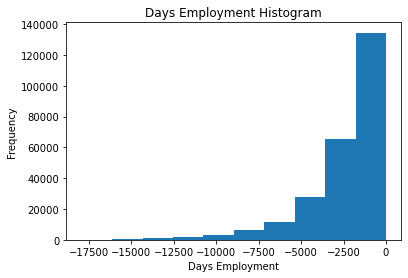

In [14]:
# Create an anomalous flag column
df['DAYS_EMPLOYED_ANOM'] = df["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

df['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

## Correlation between the features and the target

In [15]:
# Find correlations with the target and sort
correlations = df_dum.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 CODE_GENDER_M                                  0.054713
DAYS_LAST_PHONE_CHANGE                         0.055218
MIN(bureau.DAYS_ENDDATE_FACT)                  0.055887
NAME_INCOME_TYPE_Working                       0.057481
REGION_RATING_CLIENT                           0.058899
REGION_RATING_CLIENT_W_CITY                    0.060893
MODE(previous.NAME_CONTRACT_STATUS)_Refused    0.063064
NUM_UNIQUE(previous.CODE_REJECT_REASON)        0.063640
STD(previous.DAYS_FIRST_DRAWING)               0.067594
MEAN(bureau.DAYS_CREDIT_UPDATE)                0.068927
MIN(bureau.DAYS_CREDIT)                        0.075248
DAYS_BIRTH                                     0.078239
MEAN(bureau.DAYS_CREDIT)                       0.089729
TARGET                                         1.000000
set_train                                           NaN
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2           

### Focus on DAYS_BIRTH

In [16]:
# Find the correlation of the positive days since birth and target
df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH'])
df['DAYS_BIRTH'].corr(df['TARGET'])

-0.07823930830982737

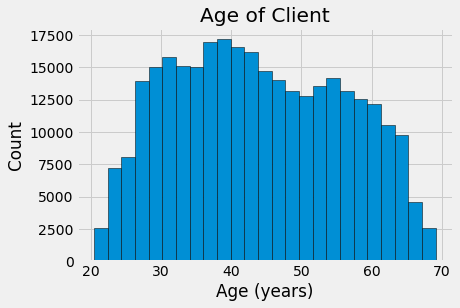

In [17]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(df['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

By itself, the distribution of age does not tell us much other than that there are no outliers as all the ages are reasonable. To visualize the effect of the age on the target, we will next make a kernel density estimation plot (KDE) colored by the value of the target. A kernel density estimate plot shows the distribution of a single variable and can be thought of as a smoothed histogram (it is created by computing a kernel, usually a Gaussian, at each data point and then averaging all the individual kernels to develop a single smooth curve). We will use the seaborn kdeplot for this graph.

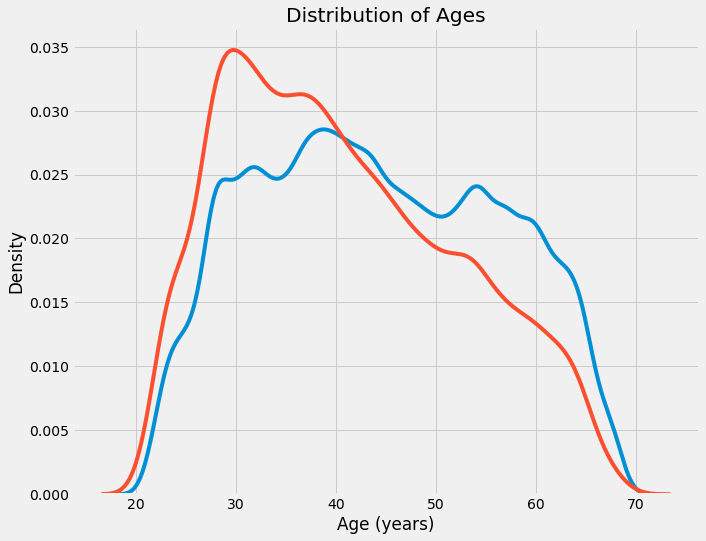

In [18]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

The target == 1 curve skews towards the younger end of the range. Although this is not a significant correlation (-0.07 correlation coefficient), this variable is likely going to be useful in a machine learning model because it does affect the target. Let's look at this relationship in another way: average failure to repay loans by age bracket.

To make this graph, first we cut the age category into bins of 5 years each. Then, for each bin, we calculate the average value of the target, which tells us the ratio of loans that were not repaid in each age category.

In [19]:
# Age information into a separate dataframe
age_data = df[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

/var/folders/2l/lrfmhv4549d6_vj6k4zkk90c0000gn/T/ipykernel_60500/3329180071.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365
/var/folders/2l/lrfmhv4549d6_vj6k4zkk90c0000gn/T/ipykernel_60500/3329180071.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [20]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


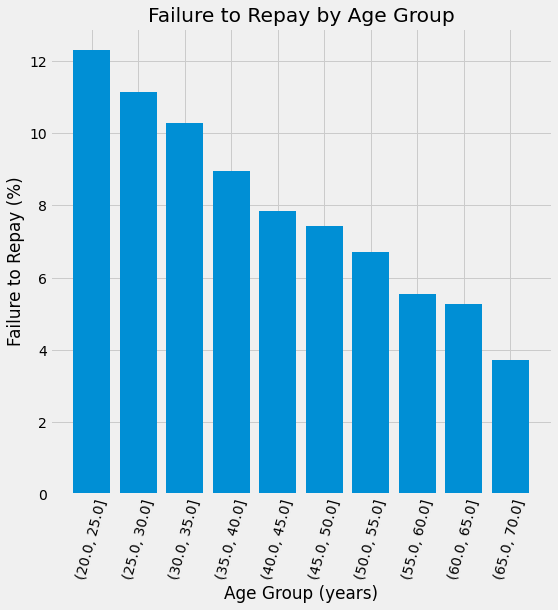

In [21]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

There is a clear trend: younger applicants are more likely to not repay the loan! The rate of failure to repay is above 10% for the youngest three age groups and beolow 5% for the oldest age group.

This is information that could be directly used by the bank: because younger clients are less likely to repay the loan, maybe they should be provided with more guidance or financial planning tips. This does not mean the bank should discriminate against younger clients, but it would be smart to take precautionary measures to help younger clients pay on time.

## Exterior Sources

The 3 variables with the strongest negative correlations with the target are EXT_SOURCE_1, EXT_SOURCE_2, and EXT_SOURCE_3. According to the documentation, these features represent a "normalized score from external data source". I'm not sure what this exactly means, but it may be a cumulative sort of credit rating made using numerous sources of data.

Let's take a look at these variables.

First, we can show the correlations of the EXT_SOURCE features with the target and with each other.

In [22]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = df[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


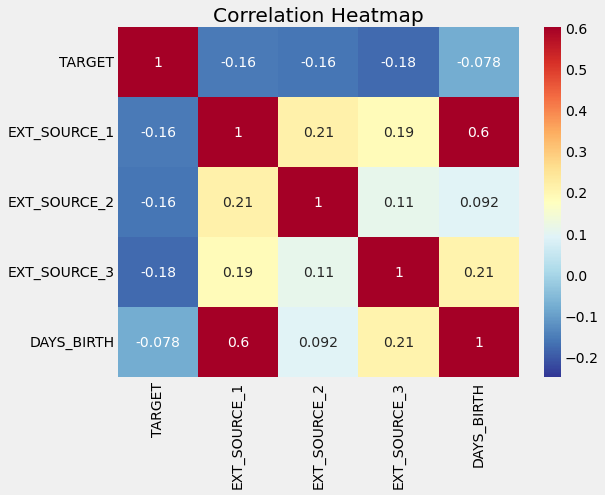

In [23]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

All three EXT_SOURCE featureshave negative correlations with the target, indicating that as the value of the EXT_SOURCE increases, the client is more likely to repay the loan. We can also see that DAYS_BIRTH is positively correlated with EXT_SOURCE_1 indicating that maybe one of the factors in this score is the client age.

Next we can look at the distribution of each of these features colored by the value of the target. This will let us visualize the effect of this variable on the target.



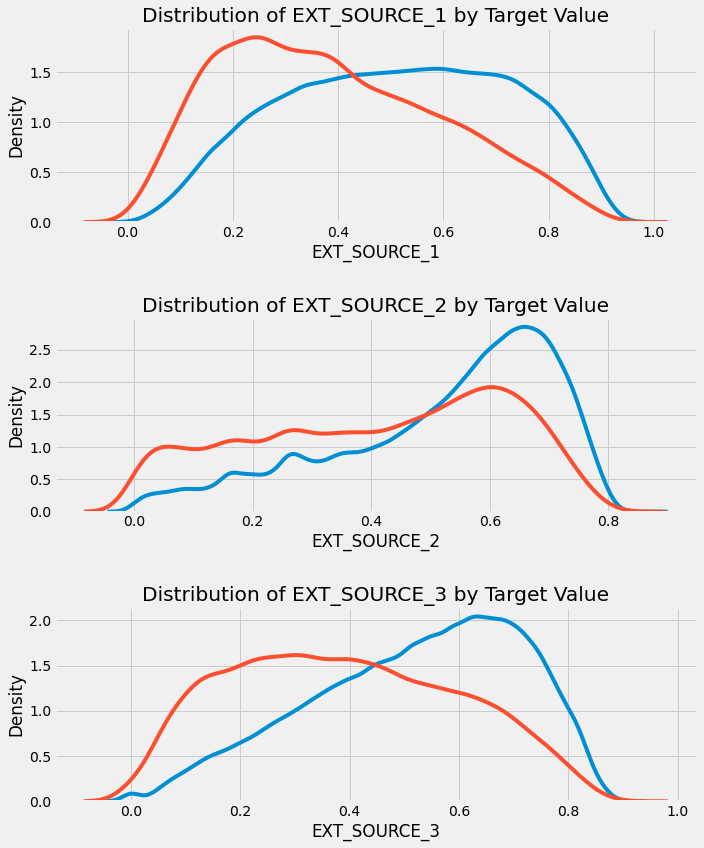

In [24]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(df.loc[df['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(df.loc[df['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

EXT_SOURCE_3 displays the greatest difference between the values of the target. We can clearly see that this feature has some relationship to the likelihood of an applicant to repay a loan. The relationship is not very strong (in fact they are all considered very weak, but these variables will still be useful for a machine learning model to predict whether or not an applicant will repay a loan on time.

# Modelisation

## modules import

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, precision_recall_curve
from sklearn.impute import SimpleImputer

## data preparation

In [26]:
y = df['TARGET']
df = df.drop('TARGET', axis=1)
df = df.set_index('SK_ID_CURR')

In [27]:
# The dataset is highly unbalanced

y.value_counts()/ len(y)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [28]:
# finding the boolean features among the numeric features

bool_col = []
for col in df.columns :
    if (len(df[col].unique()) == 2) & (df[col].dtypes != 'O'):
        bool_col.append(col)
        
df.loc[:,bool_col] = df.loc[:,bool_col].astype('boolean')

In [29]:
# Preparation of the pipeline

imp = SimpleImputer(missing_values=np.nan, strategy='mean')

# Categorical data 
cat = list(df.select_dtypes(['object']).columns)
cat_miss = df[cat].isnull().sum()
cat_to_drop = cat_miss[cat_miss != 0].index
df = df.drop(cat_to_drop, axis=1)
cat = list(df.select_dtypes(['object']).columns)
one_hot = make_pipeline(OneHotEncoder(handle_unknown='ignore'))

# Numerical data 
num = list(df.select_dtypes(['int64', 'float64']).columns)
std_log = make_pipeline(FunctionTransformer(func=np.log1p), StandardScaler())
num_trans = make_pipeline(imp, FunctionTransformer(func=np.abs), FunctionTransformer(func=np.log1p), StandardScaler())


# Final pipeline
preprocessor = make_column_transformer((num_trans, num),                                        
                                       (one_hot, cat)                                       
                                      )

### Reduced dataset for the API

In [30]:
# A random selection of 1000 examples among the dataset for deployement

data_model_sam = df.sample(1000, random_state=1)
data_model_sam.to_csv('csv/data_model_sampled.csv')

In [31]:
data_model_sam

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,...,SUM(previous.DAYS_LAST_DUE_1ST_VERSION),SUM(previous.DAYS_TERMINATION),SUM(previous.HOUR_APPR_PROCESS_START),SUM(previous.NFLAG_INSURED_ON_APPROVAL),SUM(previous.NFLAG_LAST_APPL_IN_DAY),SUM(previous.RATE_DOWN_PAYMENT),SUM(previous.RATE_INTEREST_PRIMARY),SUM(previous.RATE_INTEREST_PRIVILEGED),SUM(previous.SELLERPLACE_AREA),DAYS_EMPLOYED_ANOM
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
174545,Cash loans,F,N,Y,0,135000.0,654498.0,31617.0,585000.0,Pensioner,...,-276.0,363382.0,50.0,2.0,4.0,0.000000,0.0,0.0,2598.0,True
209898,Cash loans,M,Y,Y,0,135000.0,234576.0,25393.5,202500.0,Working,...,-11.0,-9.0,16.0,0.0,1.0,0.217839,0.0,0.0,30.0,False
454938,Cash loans,M,Y,Y,0,112500.0,157914.0,16753.5,139500.0,Working,...,-163.0,-310.0,12.0,1.0,1.0,0.000000,0.0,0.0,100.0,False
398930,Cash loans,M,Y,N,0,247500.0,1125000.0,36292.5,1125000.0,Working,...,-3745.0,-3721.0,75.0,1.0,4.0,0.574719,0.0,0.0,274.0,False
201672,Cash loans,M,N,Y,0,202500.0,900000.0,35158.5,900000.0,Working,...,363464.0,363236.0,83.0,0.0,6.0,0.334098,0.0,0.0,1576.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130000,Cash loans,F,N,N,2,180000.0,119925.0,12721.5,112500.0,Working,...,-110.0,-221.0,14.0,0.0,1.0,0.000055,0.0,0.0,135.0,False
238172,Cash loans,M,Y,Y,1,112500.0,531265.5,25969.5,373500.0,Working,...,365614.0,730486.0,37.0,0.0,4.0,0.000000,0.0,0.0,37.0,False
154023,Revolving loans,F,N,Y,0,117900.0,360000.0,18000.0,360000.0,Pensioner,...,-7907.0,355435.0,110.0,6.0,11.0,0.199432,0.0,0.0,22.0,True


In [32]:
X_train, X_test, y_train, y_test =  train_test_split(df, y, test_size=0.3,  random_state=0, shuffle=True, stratify=y)

In [33]:
#df_new =pd.DataFrame(df, columns=X_train.columns)
#df_new.to_csv('csv/data_model.csv')

## Dummy classifier

In [77]:
# baseline with a naïve model

dum = DummyClassifier(strategy='stratified')
dummy_cla = make_pipeline(preprocessor,
                        dum)
dummy_cla.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('functiontransformer-1',
                                                                   FunctionTransformer(func=<ufunc 'absolute'>)),
                                                                  ('functiontransformer-2',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['CNT_CHILDREN',
                                                   'AMT_INCOME_TOTAL',
         

In [78]:
dummy_cla.score(X_test, y_test)

0.8518438224900817

In [79]:
y_pred_dummy = dummy_cla.predict(X_test)

sklearn.metrics.f1_score(y_test, y_pred_dummy)

0.08385322331790435

In [84]:
precision_dummy, recall_dummy, F1_dummy, _ = sklearn.metrics.precision_recall_fscore_support(y_test, y_pred_dummy, pos_label=1.0, average='binary')

In [85]:
precision_dummy

0.08379139294811637

In [86]:
recall_dummy

0.08391514500537058

In [87]:
F1_dummy

0.08385322331790435

We can see that the accuracy is pretty high because of the unbalanced dataset, the F1 score is low

## Logistic Regression

In [37]:
# Modelisation with a logistic regression

lr = LogisticRegression(class_weight='balanced', max_iter= 10000 )
lr_pipeline = make_pipeline(preprocessor,
                        lr)

In [38]:
# Finding the best parameters for the model with a Randomized Search

parameters=dict(logisticregression__C=np.logspace(-3,3,7))
clf = GridSearchCV(lr_pipeline, parameters, scoring='roc_auc')
clf.fit(X_train, y_train)
clf.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('functiontransformer-1',
                                                                   FunctionTransformer(func=<ufunc 'absolute'>)),
                                                                  ('functiontransformer-2',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['CNT_CHILDREN',
                                                   'AMT_INCOME_TOTAL',
         

In [39]:
lr_pipeline = clf.best_estimator_

In [40]:
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('functiontransformer-1',
                                                                   FunctionTransformer(func=<ufunc 'absolute'>)),
                                                                  ('functiontransformer-2',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['CNT_CHILDREN',
                                                   'AMT_INCOME_TOTAL',
         

In [41]:
lr_pipeline.score(X_test, y_test)

0.7063650356624103

In [42]:
y_pred = lr_pipeline.predict(X_test)

sklearn.metrics.f1_score(y_test, y_pred)

0.2733832246989083

In [43]:
sklearn.metrics.confusion_matrix(y_test, y_pred)

array([[60069, 24737],
       [ 2352,  5096]])

In [44]:
thresholds = np.linspace(0,1,11)
confusion_matrix_array = []

for threshold in thresholds :
    y_pred_temp = (lr_pipeline.predict_proba(X_test)[:, 1] > threshold).astype('float')
    confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred_temp)
    confusion_matrix = confusion_matrix.flatten()
    confusion_matrix_array.append(confusion_matrix)
    
confusion_matrix_df = pd.DataFrame(data=confusion_matrix_array, columns=['TN', 'FP', 'FN', 'TP'], index = thresholds)

In [45]:
confusion_matrix_df

,TN,FP,FN,TP
0.0,0,84806,0,7448
0.1,2892,81914,35,7413
0.2,16163,68643,228,7220
0.3,32531,52275,698,6750
0.4,47609,37197,1422,6026
0.5,60069,24737,2352,5096
0.6,69819,14987,3455,3993
0.7,76945,7861,4727,2721
0.8,81759,3047,5988,1460
0.9,84309,497,7066,382


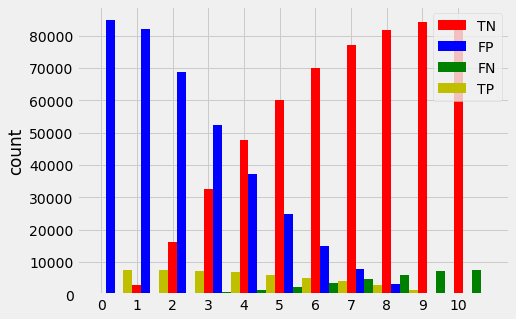

In [46]:
N = 11
TN = confusion_matrix_df.TN
FP = confusion_matrix_df.FP
FN = confusion_matrix_df.FN
TP = confusion_matrix_df.TP
ind = np.arange(N) # the x locations for the groups
width = 0.25
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, TN, width, color='r')
ax.bar(ind + 0.25, FP, width, color='b')
ax.bar(ind + 0.50, FN, width, color='g')
ax.bar(ind + 0.75, TP, width, color='y')


ax.legend(labels=['TN', 'FP', 'FN', 'TP'])
ax.set_ylabel('count')
ax.set_xticks(ind)

plt.show()

In [47]:
thresholds = np.linspace(0,0.99,11)

for threshold in thresholds :
    y_pred_temp = (lr_pipeline.predict_proba(X_test)[:, 1] > threshold).astype('float')
    print('Precision score for a treshold of ' + str(round(threshold, 1)) + ' :')
    print(sklearn.metrics.precision_recall_fscore_support(y_test, y_pred_temp, pos_label=1.0, average='binary')[0])
    print('Recall score for a treshold of ' + str(round(threshold, 1)) + ' :')
    print(sklearn.metrics.precision_recall_fscore_support(y_test, y_pred_temp, pos_label=1.0, average='binary')[1])
    print('F1 score for a treshold of ' + str(round(threshold, 1)) + ' :')
    print(sklearn.metrics.precision_recall_fscore_support(y_test, y_pred_temp, pos_label=1.0, average='binary')[2])
    print('Accuracy for a treshold of ' + str(round(threshold, 1)) + ' :')
    print(sklearn.metrics.accuracy_score(y_test, y_pred_temp))
    print('\n')

Precision score for a treshold of 0.0 :
0.08073362672621241
Recall score for a treshold of 0.0 :
1.0
F1 score for a treshold of 0.0 :
0.14940522757818298
Accuracy for a treshold of 0.0 :
0.08073362672621241


Precision score for a treshold of 0.1 :
0.08291962967932376
Recall score for a treshold of 0.1 :
0.9957035445757251
F1 score for a treshold of 0.1 :
0.15309029354692205
Accuracy for a treshold of 0.1 :
0.1105859908513452


Precision score for a treshold of 0.2 :
0.09480246751542197
Recall score for a treshold of 0.2 :
0.9697905477980666
F1 score for a treshold of 0.2 :
0.1727205337286879
Accuracy for a treshold of 0.2 :
0.2499837405424155


Precision score for a treshold of 0.3 :
0.11362032462949895
Recall score for a treshold of 0.3 :
0.9078947368421053
F1 score for a treshold of 0.3 :
0.20196529374869332
Accuracy for a treshold of 0.3 :
0.42075140373317144


Precision score for a treshold of 0.4 :
0.13832530752904124
Recall score for a treshold of 0.4 :
0.8137755102040817
F1 sco

In [88]:
thresholds = np.linspace(0.4,0.7,31)

precisions = []
recalls = []
F1s = []
accuracies = [] 

for threshold in thresholds :
    y_pred_temp = (lr_pipeline.predict_proba(X_test)[:, 1] > threshold).astype('float')
    print('Precision score for a treshold of ' + str(round(threshold, 2)) + ' :')
    precision, recall, F1, _ = sklearn.metrics.precision_recall_fscore_support(y_test, y_pred_temp, pos_label=1.0, average='binary')
    print(precision)
    recall = sklearn.metrics.precision_recall_fscore_support(y_test, y_pred_temp, pos_label=1.0, average='binary')[1]
    print('Recall score for a treshold of ' + str(round(threshold, 2)) + ' :')
    print(recall)
    print('F1 score for a treshold of ' + str(round(threshold, 2)) + ' :')
    print(F1)
    print('Accuracy for a treshold of ' + str(round(threshold, 2)) + ' :')
    accuracy = sklearn.metrics.accuracy_score(y_test, y_pred_temp)
    print(accuracy)
    print('\n')
    precisions.append(precision)
    recalls.append(recall)
    F1s.append(F1)
    accuracies.append(accuracy)

Precision score for a treshold of 0.4 :
0.1394165143557828
Recall score for a treshold of 0.4 :
0.8090762620837809
F1 score for a treshold of 0.4 :
0.2378480787827357
Accuracy for a treshold of 0.4 :
0.5813840050295922


Precision score for a treshold of 0.41 :
0.1416497066922064
Recall score for a treshold of 0.41 :
0.7943071965628357
F1 score for a treshold of 0.41 :
0.24042427813789038
Accuracy for a treshold of 0.41 :
0.5948034773559954


Precision score for a treshold of 0.42 :
0.1444904640261898
Recall score for a treshold of 0.42 :
0.7822234156820623
F1 score for a treshold of 0.42 :
0.24392388369025936
Accuracy for a treshold of 0.42 :
0.6085047802805298


Precision score for a treshold of 0.43 :
0.1476601428057739
Recall score for a treshold of 0.43 :
0.7718850698174007
F1 score for a treshold of 0.43 :
0.24789789142339705
Accuracy for a treshold of 0.43 :
0.6218700544149847


Precision score for a treshold of 0.44 :
0.15086000319505832
Recall score for a treshold of 0.44 :
0.

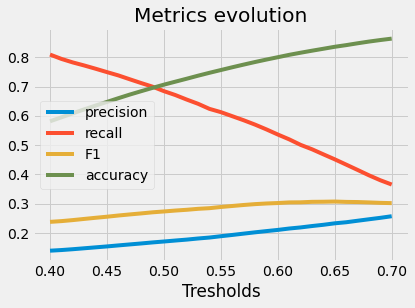

In [49]:
plt.plot(thresholds, precisions, label='precision')
plt.plot(thresholds,recalls, label='recall')
plt.plot(thresholds,F1s, label='F1')
plt.plot(thresholds,accuracies, label='accuracy')
plt.xlabel('Tresholds')
plt.legend()
plt.title('Metrics evolution')
plt.show()

In [50]:
y_pred = (lr_pipeline.predict_proba(X_test)[:, 1] > 0.66).astype('float')
sklearn.metrics.accuracy_score(y_test, y_pred)

0.8413185336137187

In [51]:
y_pred = (lr_pipeline.predict_proba(X_test)[:, 1] > 0.5).astype('float')
sklearn.metrics.accuracy_score(y_test, y_pred)

0.7063650356624103

In [52]:
sklearn.metrics.roc_curve

<function sklearn.metrics._ranking.roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)>

In [53]:
score = lr_pipeline.predict_proba(X_test)

In [54]:
score[:,1]

array([0.50267782, 0.45590684, 0.35998415, ..., 0.4384649 , 0.7023823 ,
       0.46302173])

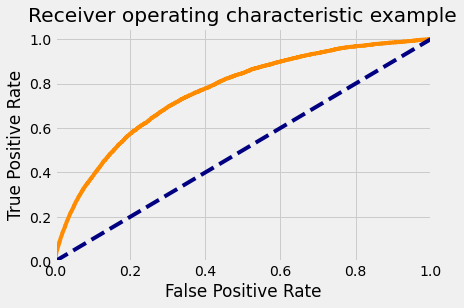

In [55]:
fpr, tpr, _ = sklearn.metrics.roc_curve(y_test, score[:,1])

plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.show()

In [56]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99948117, 0.99948117,
       1.        ])

In [57]:
roc_auc_score(y_test, score[:,1])

0.7623687444672168

In [58]:
lr_precision, lr_recall, thresholds = precision_recall_curve(y_test, score[:,1])

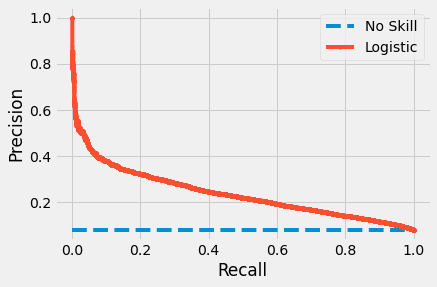

In [59]:
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

### Model export

In [60]:
import joblib

In [61]:
joblib.dump(lr_pipeline, 'reg_log.sav')

['reg_log.sav']

## model analysis

In [62]:
coefs = lr_pipeline[1].coef_[0]

In [63]:
ind_pos = np.argpartition(coefs, -5)[-5:]
ind_neg = np.argpartition(coefs, 5)[:5]


ind_pos = ind_pos[np.argsort(coefs[ind_pos])]
ind_neg = ind_neg[np.argsort(coefs[ind_neg])]

In [64]:
pd.get_dummies(df).columns[ind_pos]

Index(['STD(bureau.AMT_CREDIT_SUM_DEBT)',
       'ORGANIZATION_TYPE_Business Entity Type 1',
       'ORGANIZATION_TYPE_Industry: type 4', 'NAME_INCOME_TYPE_Unemployed',
       'AMT_CREDIT'],
      dtype='object')

In [65]:
pd.get_dummies(df).columns[ind_neg]

Index(['AMT_GOODS_PRICE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'STD(bureau.CNT_CREDIT_PROLONG)', 'ORGANIZATION_TYPE_Housing'],
      dtype='object')

In [66]:
pd.get_dummies(df)[['SUM(previous.AMT_APPLICATION)', 'SUM(previous.AMT_GOODS_PRICE)',
       'ORGANIZATION_TYPE_Business Entity Type 2',
       'SKEW(previous.AMT_APPLICATION)', 'SKEW(previous.SELLERPLACE_AREA)']]

,SUM(previous.AMT_APPLICATION),SUM(previous.AMT_GOODS_PRICE),ORGANIZATION_TYPE_Business Entity Type 2,SKEW(previous.AMT_APPLICATION),SKEW(previous.SELLERPLACE_AREA)
SK_ID_CURR,,,,,
100002,179055.00,179055.00,0,NaN,NaN
100003,1306309.50,1306309.50,0,0.983632,1.595880
100004,24282.00,24282.00,0,NaN,NaN
100006,2449829.34,2449829.34,0,0.469986,2.999915
100007,903181.50,903181.50,0,-0.762988,0.963514
...,...,...,...,...,...
456251,40455.00,40455.00,0,NaN,NaN
456252,57595.50,57595.50,0,NaN,NaN
456253,48325.50,48325.50,0,NaN,NaN


In [67]:
df.ORGANIZATION_TYPE.unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [68]:
np.argmax(coefs)

2

In [69]:
np.max(coefs)

0.6808186974813684

## Smote and Random Under Sampler

In [70]:
x

NameError: name 'x' is not defined

In [ ]:
import imblearn

In [ ]:
print(imblearn.__version__)

In [ ]:
over = imblearn.over_sampling.SMOTE(sampling_strategy='auto')
under = imblearn.under_sampling.RandomUnderSampler(sampling_strategy='auto')

In [ ]:
lr = LogisticRegression(class_weight='balanced', max_iter= 10000)

In [ ]:
pipeline_smote = imblearn.pipeline.make_pipeline(preprocessor, over, under, lr)
pipeline_smote.fit(X_train, y_train)
pipeline_smote.score(X_test, y_test)

In [ ]:
y_pred = pipeline_smote.predict(X_test)

sklearn.metrics.f1_score(y_test, y_pred)

In [ ]:
sklearn.metrics.confusion_matrix(y_test, y_pred)